## Example Classification using the Iris Data

First we need the standard import

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Version:  0.0.15


### Load the Data

In [3]:
data=load_excel('data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]


### Look at the data

it's a good idea to look at the data a little bit, know the shapes, etc...

In [4]:
print(data.vectors.shape)
print(data.targets)
print(data.target_names)
print(data.feature_names)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm']


since you can't plot 4 dimensions, try plotting some 2D subsets

I don't like the automatic placement of the legend, so lets set it manually

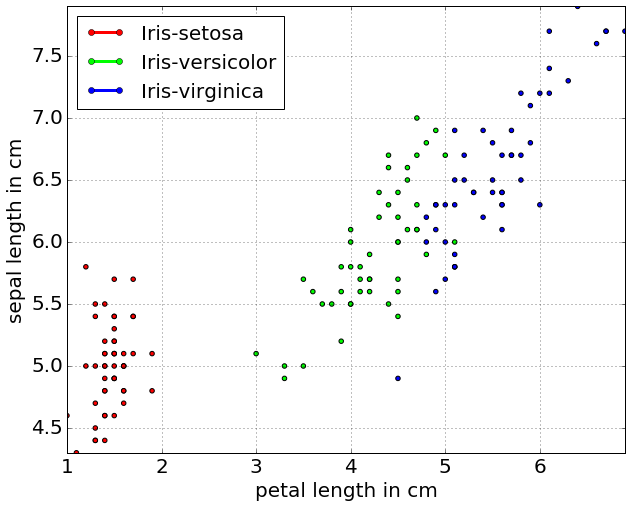

In [5]:
subset=extract_features(data,[0,2])
plot2D(subset,legend_location='upper left')

plot all of the combinations

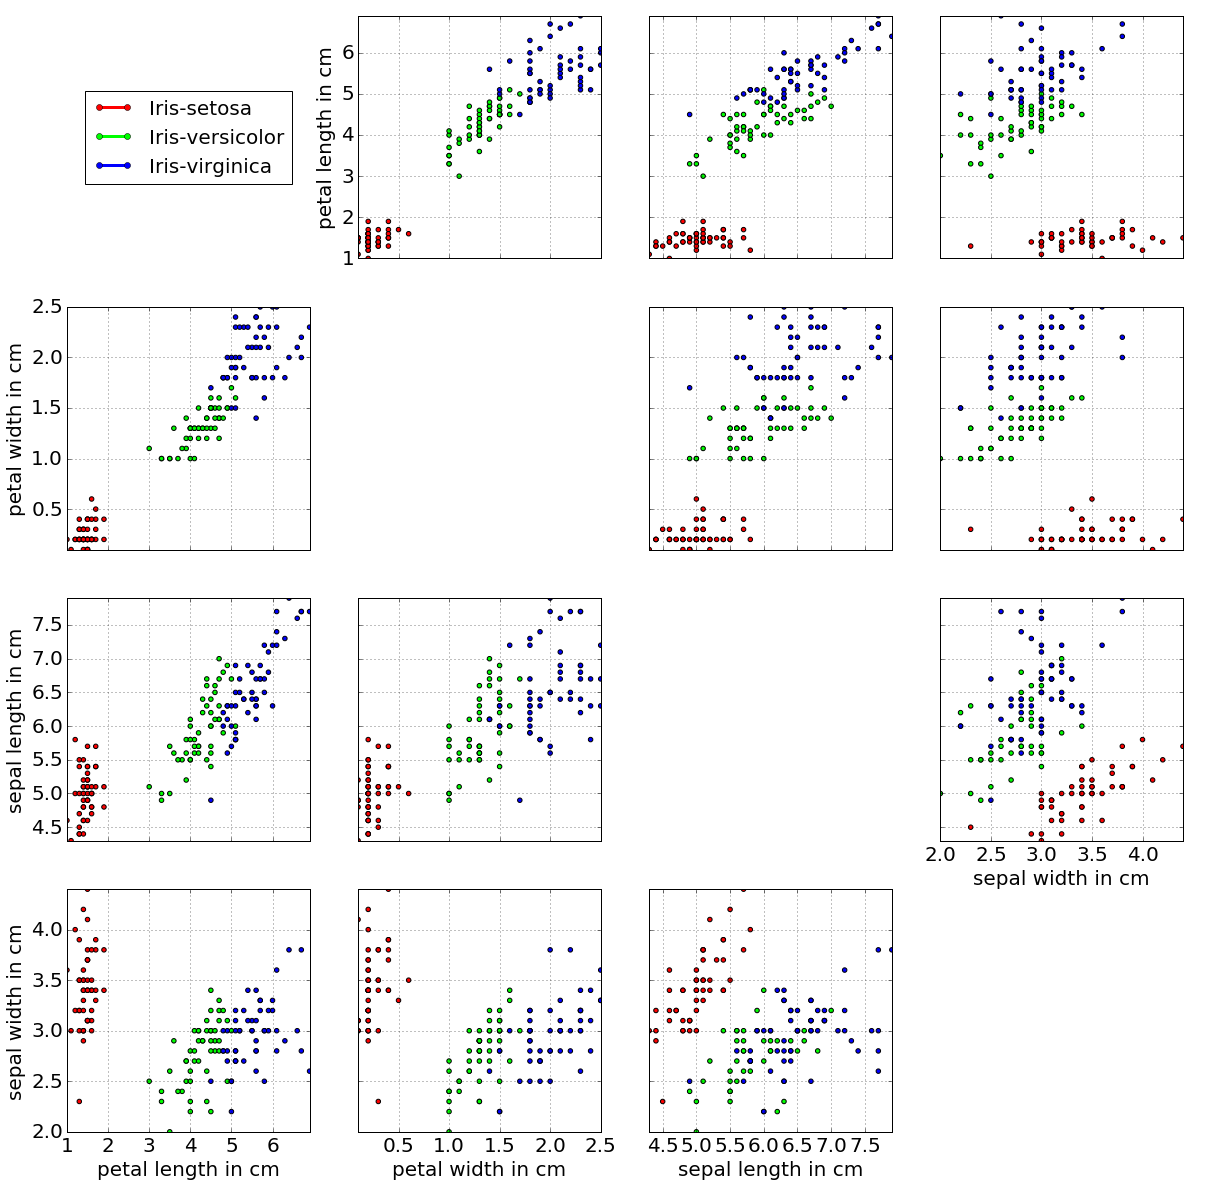

In [6]:
plot_feature_combinations(data)

I don't want to do the classification on this subset, so make sure to use the entire data set.

## Classification

First, we choose a classifier

In [7]:
C=NaiveBayes()

Split the data into test and train subsets...

In [8]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


...and then train...

In [9]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.001149892807006836 seconds 


In [10]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 95.0
On Test Set: 100.0


some classifiers have properties that are useful to look at.  Naive Bayes has  *means* and *stddevs*...

In [11]:
C.means

array([[ 1.44473684,  0.23157895,  5.01578947,  3.42368421],
       [ 4.26428571,  1.33333333,  5.96666667,  2.80714286],
       [ 5.5225    ,  1.9975    ,  6.5475    ,  2.9625    ]])

In [12]:
C.stddevs

array([[ 0.02826178,  0.0100554 ,  0.13606649,  0.13496538],
       [ 0.2184864 ,  0.03888889,  0.26317461,  0.09113946],
       [ 0.32174375,  0.08074375,  0.44149375,  0.10334375]])

Leave-one-out cross validation is an alternative to splitting the data, so we use the entire data set.

In [13]:
scores, result=leaveoneout_cross_validation(C,data.vectors,data.targets)
print(result)

0.953 +- 0.034


### k-NearestNeighbor

In [14]:
C=kNearestNeighbor()
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.0016169548034667969 seconds 


In [15]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 97.5
On Test Set: 96.6666666667


### Perceptron

In [16]:
C=Perceptron()
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  0.002880096435546875 seconds 
On Training Set: 70.0
On Test Set: 80.0


### Backprop

In [17]:
C=BackProp(hidden_layer_sizes = [5])
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  0.06272506713867188 seconds 
On Training Set: 100.0
On Test Set: 96.6666666667


In [18]:
C.n_layers_

3

In [19]:
[w.shape for w in C.layers_coef_]

[(4, 5), (5, 3)]